In [ ]:
#default_exp augmentation

In [ ]:
#hide
#run to export library
from nbdev.export import notebook2script; notebook2script()

Converted 00_augmentation.ipynb.
Converted 00_baseline.ipynb.
Converted 00_helpers.ipynb.
Converted 00_training.ipynb.
Converted 00_unet.ipynb.
Converted index.ipynb.


In [ ]:
#export
import torch
from noise2noise.helpers import *
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt

# Augmentations

In [ ]:
noisy_imgs_1 , noisy_imgs_2 = load_images()
imgs_1 = noisy_imgs_1[:2]
imgs_2 = noisy_imgs_2[:2]

In [ ]:
#export
class RandomResizedCrop():
    
    def __init__(self):
        pass
    
    def apply_transform(self,image,target):
        i, j, h, w = transforms.RandomResizedCrop.get_params(
            image,scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333))
        
        output_shape = list(image.shape[-2:])
        
        trans_image = TF.resized_crop(image,i, j, h, w,output_shape)
        trans_target = TF.resized_crop(target,i, j, h, w,output_shape)

        return trans_image, trans_target
    def __call__(self, imgs):
        image,target = imgs
        return self.apply_transform(image,target)

In [ ]:
random_crop = RandomResizedCrop()
cropped_1, cropped_2 = random_crop((imgs_1,imgs_2))
cropped_1.shape, cropped_2.shape

(torch.Size([2, 3, 32, 32]), torch.Size([2, 3, 32, 32]))

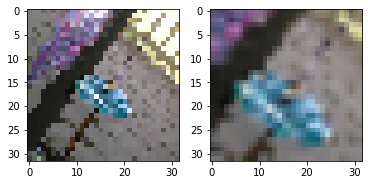

In [ ]:
_, axs = plt.subplots(1,2)
show_img(to_float_image(imgs_1[0]),axis=axs[0])
show_img(to_float_image(cropped_1[0]),axis=axs[1])

In [ ]:
#export
class RandomRotation():
    
    def __init__(self):
        pass
    
    def apply_transform(self,image,target):
        angle = transforms.RandomRotation.get_params([0,360])
        
       
        trans_image = TF.rotate(image, angle)
        trans_target = TF.rotate(target, angle)
        
        
        return trans_image, trans_target
    def __call__(self, imgs):
        image,target = imgs
        return self.apply_transform(image,target)

In [ ]:
random_rotate = RandomRotation()
rotate_1, rotate_2 = random_crop((imgs_1,imgs_2))
cropped_1.shape, cropped_2.shape

(torch.Size([2, 3, 32, 32]), torch.Size([2, 3, 32, 32]))

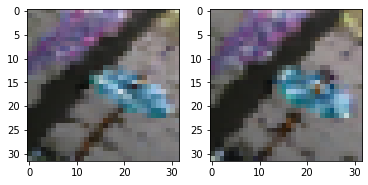

In [ ]:
_, axs = plt.subplots(1,2)
show_img(to_float_image(rotate_1[0]),axis=axs[0])
show_img(to_float_image(rotate_2[0]),axis=axs[1])